# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


1. The ask is to use GridSearchCV to brute force optimal hyper parameters for a random forest model and select the one that performs best. Accuracy is a straightforward metric for a balanced dataset like this where our goal is to classify videos as either claims or opinions.
2. Depending on what our client wishes to do with the classification model, those wrongly classified may receive unintended consequences. For instance, if TikTok wishes to push more viewership to the "claims" videos, then those wrongly classified as "opinions" may not recieve the extra viewership. There may need to be steps to manually review some of the classifications.
3. Initial EDA to review the dataset again and drop some missing data, Data Preprocessing, Generating a Correlation Matrix and Selecting Features, Train a Random Forest and XGBoost Model, Compile Results and Summarize.

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###


# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.ensemble import RandomForestClassifier

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("../Tiktok Dataset/tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe(include = "all")

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data.dropna(axis = 0)

In [10]:

# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().value_counts()

False    19084
Name: count, dtype: int64

Check for and handle outliers.

In [12]:
### YOUR CODE HERE ###

def get_outliers(col_str):
    median = data[col_str].median()
    iqr = data[col_str].quantile(0.75) - data[col_str].quantile(0.25)
    return data[(data[col_str] > (median + 1.5 * iqr)) | (data[col_str] < (median - 1.5 * iqr))]

for i in data.columns:
    if data[i].dtype == "int64" or data[i].dtype == "float64":
        print(f"Number of outliers in column {i}: {get_outliers(i).shape[0]}")
    

Number of outliers in column #: 0
Number of outliers in column video_id: 0
Number of outliers in column video_duration_sec: 0
Number of outliers in column video_view_count: 2343
Number of outliers in column video_like_count: 3468
Number of outliers in column video_share_count: 3732
Number of outliers in column video_download_count: 3733
Number of outliers in column video_comment_count: 3882


Check class balance.

In [13]:
# Check class balance
### YOUR CODE HERE ###

data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [14]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###

data['transcript_length'] = data['video_transcription_text'].str.len()

Calculate the average text_length for claims and opinions.

In [15]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcript_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for claims and opinions.

Text(0.5, 1.0, 'Transcript Length Distribution for Claims vs Opinions')

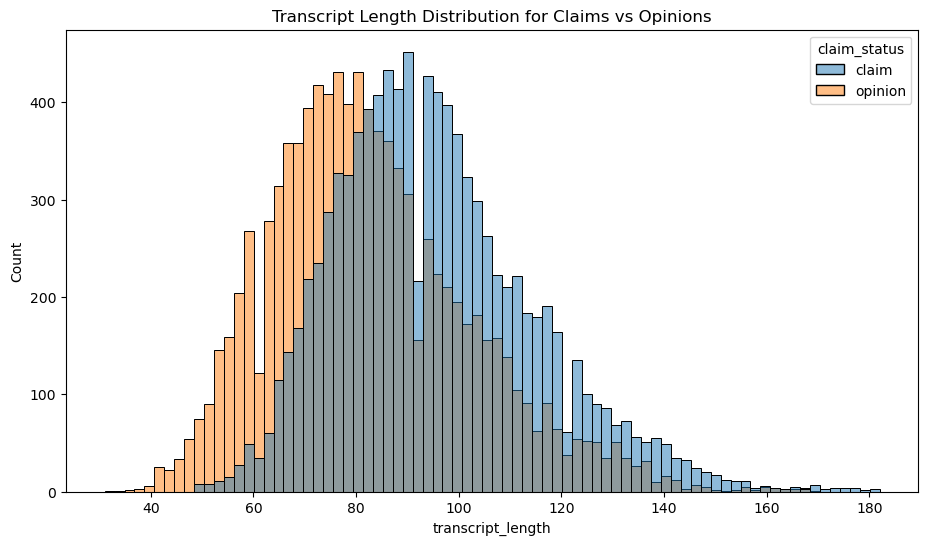

In [16]:
# Visualize the distribution of `video_transcription_text` length for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
plt.figure(figsize = (11,6))
sns.histplot(x = data['transcript_length'], hue = data['claim_status'])
plt.title("Transcript Length Distribution for Claims vs Opinions")

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

<Axes: >

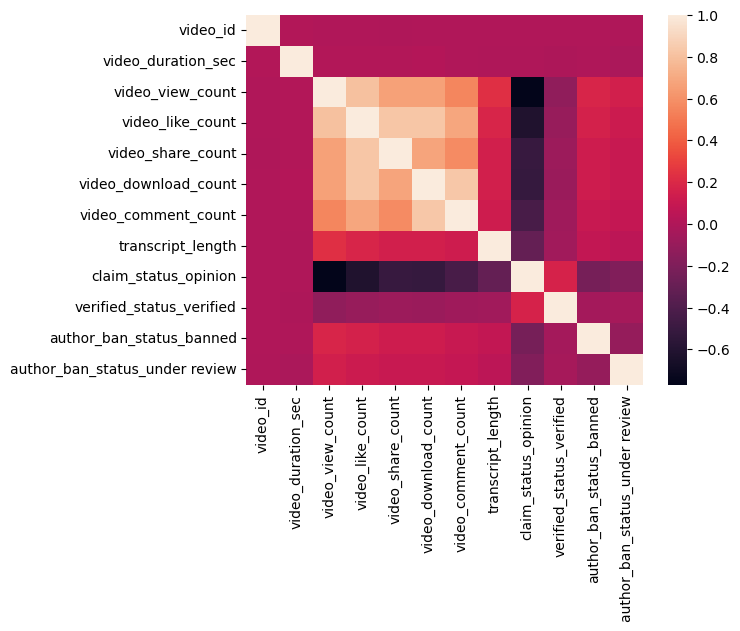

In [17]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###

preprocessed_data = pd.get_dummies(data.drop(["#","video_transcription_text"], axis = 1), drop_first = True)
corr = preprocessed_data.corr()
sns.heatmap(corr)

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Feature engineering**

Select the outcome variable.

In [18]:
# Select outcome variable
y = preprocessed_data['claim_status_opinion']

**Feature selection and transformation**

Encode target and catgorical variables.

In [19]:
#NOTE: none of the encoding needs to be done because pd.get_dummies was called earlier

# Display first few rows
### YOUR CODE HERE ###

y.head()

0    False
1    False
2    False
3    False
4    False
Name: claim_status_opinion, dtype: bool

### **Task 4. Split the data**


Assign target variable.

In [20]:
#NOTE: none of the encoding needs to be done because pd.get_dummies was called earlier

Isolate the features.

In [21]:
#Isolate features
X = preprocessed_data.drop(['claim_status_opinion', 'video_id'], axis = 1)
# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcript_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [22]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [23]:
### YOUR CODE HERE ###

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state = 0, test_size = .25)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [24]:
print(f"y-test: {y_test.shape}")
print(f"y-val: {y_val.shape}")
print(f"y-train: {y_train.shape}")
print(f"X-test: {X_test.shape}")
print(f"X-val: {X_val.shape}")
print(f"X-train: {X_train.shape}")

y-test: (3817,)
y-val: (3817,)
y-train: (11450,)
X-test: (3817, 10)
X-val: (3817, 10)
X-train: (11450, 10)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, PredefinedSplit
# Instantiate the random forest classifier
rf_clf = RandomForestClassifier(random_state = 0)

# Create a dictionary of hyperparameters to tune
hyperparameters = {"max_depth" : [2,3,4,5, None],
                   "min_samples_leaf" : [1,2,3],
                   "min_samples_split" : [2,3,4],
                   "max_features" : [2,3,4],
                   "n_estimators" : [75, 100, 125, 150]
                  }


# Define a dictionary of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1"}


# Instantiate the GridSearchCV object
split_index = [0 if x in X_val.index else -1 for x in X_trainval.index]
custom_split = PredefinedSplit(split_index)
gs_clf = GridSearchCV(rf_clf, param_grid = hyperparameters, scoring = scoring, cv = custom_split, refit = "recall").fit(X_trainval, y_trainval)

In [26]:
# Examine best recall score
gs_clf.best_score_


1.0

In [27]:
  # Get all the results from the CV and put them in a df
rf_cv_results = pd.DataFrame(gs_clf.cv_results_)

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###
rf_cv_results[rf_cv_results["mean_test_precision"] == rf_cv_results["mean_test_precision"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,std_test_precision,rank_test_precision,split0_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,mean_test_f1,std_test_f1,rank_test_f1
328,0.388288,0.0,0.033383,0.0,5,2,1,3,75,"{'max_depth': 5, 'max_features': 2, 'min_sampl...",...,0.0,1,0.998943,0.998943,0.0,10,0.994214,0.994214,0.0,7


In [28]:
# Examine best parameters
### YOUR CODE HERE ###
gs_clf.best_estimator_

RandomForestClassifier(max_depth=2, max_features=4, n_estimators=150,
                       random_state=0)

**Question:** How well is your model performing? Consider average recall score and precision score.
//The random forest performed very well on the test data.

### **Build an XGBoost model**

In [29]:
import xgboost
from xgboost import XGBClassifier
# Instantiate the XGBoost classifier
xgb_clf = XGBClassifier(objective = 'binary:logistic', random_state = 0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }


# Define a dictionary of scoring metrics to capture
# Already defined above

# Instantiate the GridSearchCV object
xgb_gs = GridSearchCV(xgb_clf, param_grid = cv_params, scoring = scoring, cv = 5, refit = "recall").fit(X_trainval, y_trainval)


In [30]:
  # Get all the results from the CV and put them in a df
xgb_cv_results = pd.DataFrame(xgb_gs.cv_results_)

  # Isolate the row of the df with the max(mean precision score)
xgb_cv_results[xgb_cv_results["mean_test_precision"] == xgb_cv_results["mean_test_precision"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
29,0.069225,0.000773,0.012322,0.000104,0.7,0.3,4,5,15,0.7,...,0.0,1,0.995058,0.992116,0.99604,0.994399,0.9967,0.994862,0.001585,1


**Question:** How well does your model perform? Consider recall score and precision score.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [31]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
### YOUR CODE HERE ###

rf_y_pred = gs_clf.best_estimator_.predict(X_test)

Display the predictions on the encoded testing set.

In [32]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###

rf_y_pred

array([False,  True, False, ...,  True, False,  True])

Display the true labels of the testing set.

In [33]:
# Display the true labels of the testing set

y_test

3695     False
11495     True
7604     False
12728     True
875      False
         ...  
5488     False
10842     True
16253     True
1933     False
15475     True
Name: claim_status_opinion, Length: 3817, dtype: bool

Create a confusion matrix to visualize the results of the classification model.

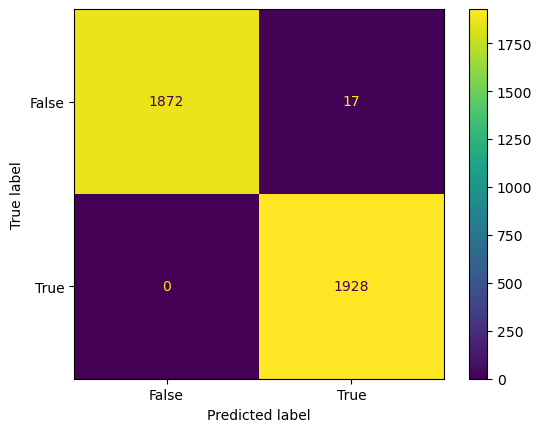

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a confusion matrix to visualize the results of the classification model


# Compute values for confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels = gs_clf.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [35]:
from sklearn.metrics import classification_report
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

       False       1.00      0.99      1.00      1889
        True       0.99      1.00      1.00      1928

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

#### **XGBoost**

In [36]:
#Evaluate XGBoost model
### YOUR CODE HERE ###
xgb_gs.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

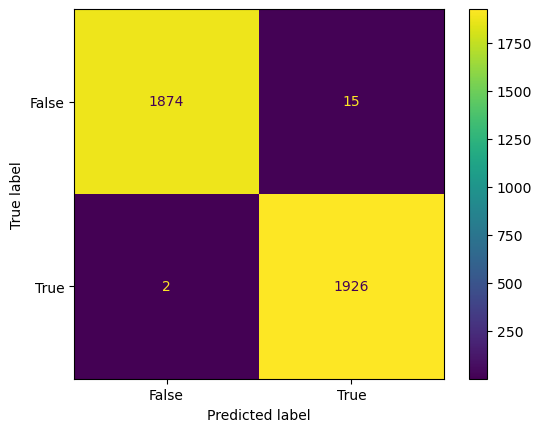

In [37]:
# Compute values for confusion matrix
xgb_y_pred = xgb_gs.best_estimator_.predict(X_test)

# Create display of confusion matrix
cm = confusion_matrix(y_test, xgb_y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels = xgb_gs.classes_)

# Display plot
### YOUR CODE HERE ###
disp.plot()


In [38]:
# Create a classification report
### YOUR CODE HERE ###
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

       False       1.00      0.99      1.00      1889
        True       0.99      1.00      1.00      1928

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

### **Use champion model to predict on test data**

In [39]:
### YOUR CODE HERE ###
#The 

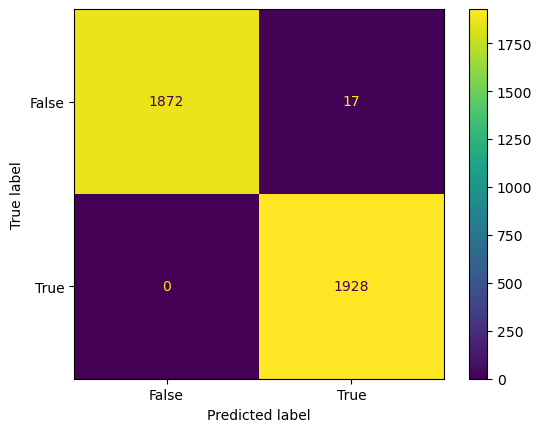

In [40]:
# Compute values for confusion matrix
rf_y_pred = gs_clf.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, rf_y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels = gs_clf.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()


#### **Feature importances of champion model**


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

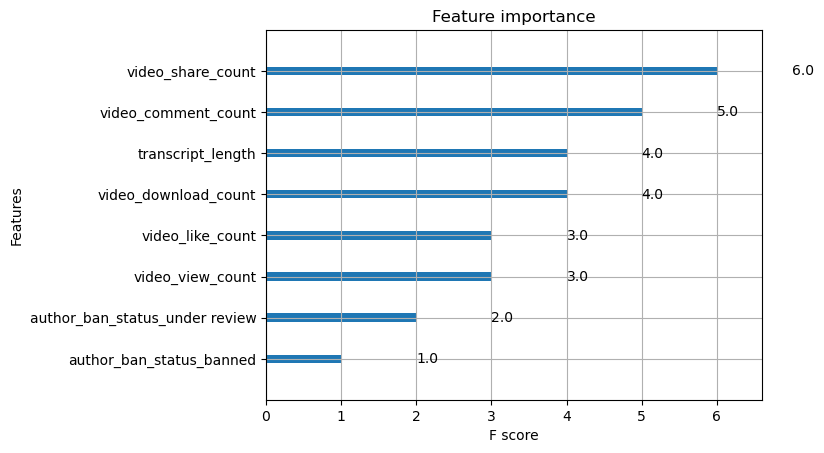

In [41]:
### YOUR CODE HERE ###
from xgboost import plot_importance
plot_importance(xgb_gs.best_estimator_)

**Question:** Describe your most predictive features. Were your results surprising?

I am surprised by the fact that transcript_length is so high up in feature importance, though I also noticed that transcript_length has no correlation with the video duration which brings into question the reliability of this transcript_length variable. I am also surprised that author ban status placed at the bottom, though all of the features were quite important.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


1. Yes the model performed excellently on our fictitious data with minimal error on both accuracy and f1 score.
2. I chose the random forest model as my champion model as I feel it will have better runtime than the xgboost model. The random forest model under the GridSearchCV brute force algorithm was testing different combinations of hyperparameters: how many trees, how many features to focus on per tree to decorrelate each tree, minimum how many samples should compose a leaf, etc. And it settled on the optimal parameter set based on the recall score (decided by the lab). The model is composed of individual base learners (decision trees) that together account for all features, feature weights, etc. Based on those decision trees, it would feed the sample through, and the trees (based on majority vote) would decide how to classify the sample.
3. If we combined some features that are highly correlated with each other or removed one, the model might have worked better. 
4. Some features that could be relevant to classifying videos would be video like to dislike ratio (if the platform supports dislikes) and video retention rate (a metric of how many users actually watch further into the video).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.